# **Downloading the dataset using kaggle API**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"mohamedelkhadrawy","key":"17d6bf7be5885263e3e40a927e510f2f"}'}

In [4]:
 !mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
# copy the json file to the folder .kaggle in the root directory
!cp kaggle.json ~/.kaggle/

In [6]:
# change folder permissions to be able to read and write
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!pwd

/content


In [8]:
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [9]:
%cd /content/dataset

/content/dataset


In [10]:
!pwd

/content/dataset


In [11]:
!kaggle datasets list -s "Churn Modelling"

ref                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shubh0799/churn-modelling           Churn Modelling                                262KB  2020-06-20 17:33:28           6605        138  1.0              
shrutimechlearn/churn-modelling     Churn Modelling                                262KB  2019-04-03 20:00:23          11240        156  0.7647059        
shivan118/churn-modeling-dataset    Churn Modeling Dataset                         262KB  2020-06-25 13:07:33            540         45  0.9411765        
hj5992/bank-churn-modelling         Bank Churn Modelling                           262KB  2017-12-10 11:43:38           1553         22  0.29411766       
davinwijaya/customer-retention      Marketing Promotion Campaign Uplif

In [12]:
!kaggle datasets download -d "shrutimechlearn/churn-modelling"

churn-modelling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip "/content/dataset/churn-modelling.zip"

Archive:  /content/dataset/churn-modelling.zip
replace Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Reading the dataset**

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('/content/dataset/Churn_Modelling.csv')

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.drop(labels=['RowNumber',	'CustomerId',	'Surname'], axis=1, inplace=True)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#**Preprocessing**

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="pastel")

In [22]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

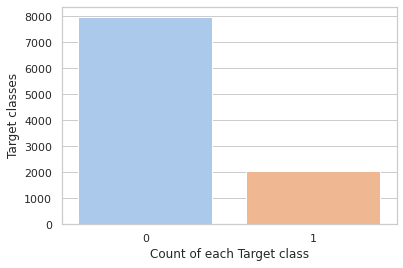

In [23]:
sns.countplot(x=df['Exited'])
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [24]:
# This data is note balanced

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


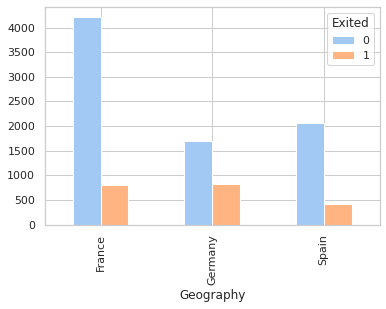

In [25]:
CrosstabResult=pd.crosstab(index=df['Geography'],columns=df['Exited'])
print(CrosstabResult)
CrosstabResult.plot.bar()

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


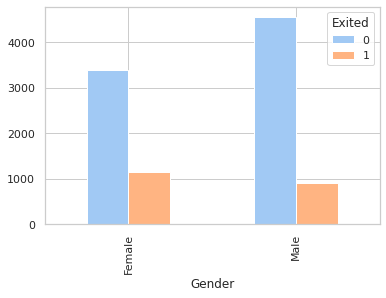

In [26]:
CrosstabResult=pd.crosstab(index=df['Gender'],columns=df['Exited'])
print(CrosstabResult)
CrosstabResult.plot.bar()

Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424


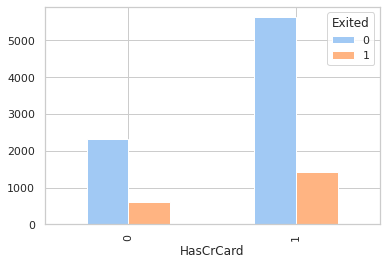

In [27]:
CrosstabResult=pd.crosstab(index=df['HasCrCard'],columns=df['Exited'])
print(CrosstabResult)
CrosstabResult.plot.bar()

Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735


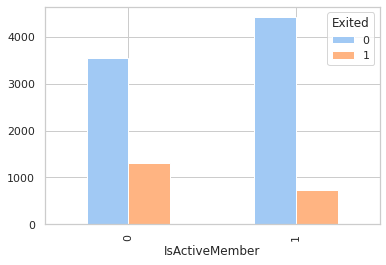

In [28]:
CrosstabResult=pd.crosstab(index=df['IsActiveMember'],columns=df['Exited'])
print(CrosstabResult)
CrosstabResult.plot.bar()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [30]:
df_X = df.iloc[:, 0:10]
df_y = df.iloc[:, 10]

In [31]:
pd.get_dummies(df_X['Geography'], prefix='Geography')

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [32]:
df_X = pd.concat([df_X, pd.get_dummies(df_X['Geography'], prefix='Geography')], axis=1)

In [33]:
df_X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0,1,0


In [34]:
pd.get_dummies(df_X['Gender'], prefix='Gender')

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [35]:
df_X = pd.concat([df_X, pd.get_dummies(df_X['Gender'], prefix='Gender').iloc[:,0]], axis=1)

In [36]:
df_X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,0,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,1,0,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,0,1,0,0


In [37]:
df_X.drop(['Gender', 'Geography'], axis=1, inplace=True)

In [38]:
df_X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0


# **Splitting the dataset**

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df_X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0


In [41]:
df_y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [42]:
X_train, X_validation, y_train, y_validation = train_test_split(df_X, df_y, test_size=0.2, stratify=df_y, random_state=17)

# **Normalization**

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scalar = StandardScaler()

In [45]:
X_train = scalar.fit_transform(X_train)

In [46]:
X_validation = scalar.transform(X_validation)

# **Model training**

In [47]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import Metric
import tensorflow as tf

In [48]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=(12,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6656      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [49]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(class_id=1)])

In [50]:
loss_checkpoint = ModelCheckpoint('best_loss.h5', monitor="val_loss")

In [51]:
tf.keras.utils.to_categorical(y_validation)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [52]:
model.fit(X_train,
          tf.keras.utils.to_categorical(y_train),
          validation_data=(X_validation, tf.keras.utils.to_categorical(y_validation)),
          epochs=100,
          batch_size=5,
          callbacks=[loss_checkpoint])

Epoch 1/100
1600/1600 [==============================] - 11s 6ms/step - loss: 0.5319 - accuracy: 0.7962 - precision: 0.0000e+00 - val_loss: 0.5009 - val_accuracy: 0.7965 - val_precision: 0.0000e+00
Epoch 2/100
1600/1600 [==============================] - 9s 6ms/step - loss: 0.4697 - accuracy: 0.7962 - precision: 0.0000e+00 - val_loss: 0.4285 - val_accuracy: 0.7965 - val_precision: 0.0000e+00
Epoch 3/100
1600/1600 [==============================] - 10s 6ms/step - loss: 0.4012 - accuracy: 0.7962 - precision: 0.0000e+00 - val_loss: 0.3963 - val_accuracy: 0.7965 - val_precision: 0.0000e+00
Epoch 4/100
1600/1600 [==============================] - 9s 6ms/step - loss: 0.3769 - accuracy: 0.8119 - precision: 0.7256 - val_loss: 0.3764 - val_accuracy: 0.8440 - val_precision: 0.7461
Epoch 5/100
1600/1600 [==============================] - 10s 6ms/step - loss: 0.3631 - accuracy: 0.8556 - precision: 0.7222 - val_loss: 0.3947 - val_accuracy: 0.8320 - val_precision: 0.5757
Epoch 6/100
1600/1600 [=====

# **Evaluating the model**

In [53]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

In [54]:
model = load_model('/content/dataset/best_loss.h5')

In [55]:
y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)

In [56]:
y_pred_validation = model.predict(X_validation)
y_pred_validation = np.argmax(y_pred_validation, axis=1)


In [57]:
def compute_classification_report(y_true, y_pred):
  target_names = ['No', 'Yes']
  print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

In [58]:
compute_classification_report(y_train, y_pred_train)

              precision    recall  f1-score   support

          No     0.9820    0.9912    0.9866      6370
         Yes     0.9643    0.9288    0.9462      1630

    accuracy                         0.9785      8000
   macro avg     0.9731    0.9600    0.9664      8000
weighted avg     0.9784    0.9785    0.9783      8000



In [59]:
compute_classification_report(y_validation, y_pred_validation)

              precision    recall  f1-score   support

          No     0.8676    0.9008    0.8839      1593
         Yes     0.5434    0.4619    0.4993       407

    accuracy                         0.8115      2000
   macro avg     0.7055    0.6814    0.6916      2000
weighted avg     0.8016    0.8115    0.8056      2000

